In [2]:

k=26.24684351
ka2=k*0.04 #/eV
V0=10 #eV
a=0.2 #nm
import numpy as np
import matplotlib.pyplot as plt


$2 m/\bar{h}^2=26.24684351 /nm^2eV$

In [7]:
def f_even(E):
    return np.sqrt(E)*np.sin(np.sqrt(k*a**2*E))-np.sqrt(V0-E)*np.cos(np.sqrt(k*a**2*E))
def f_odd(E):
    return np.sqrt(E)*np.sin(np.sqrt(k*a**2*E))+np.sqrt(V0-E)*np.cos(np.sqrt(k*a**2*E))

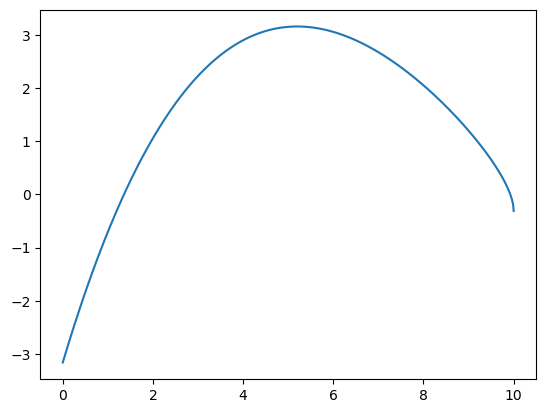

In [8]:
E=np.linspace(0,V0,1000)
plt.plot(E,f_even(E))

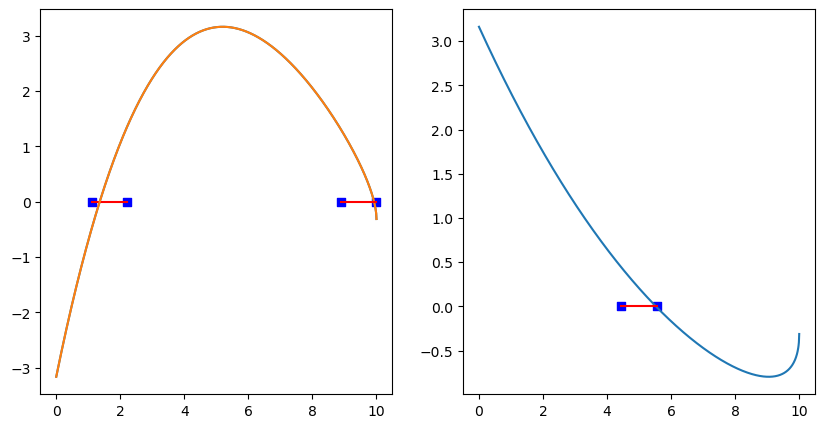

In [9]:
def find_bracket(f,rg=[-3,3],n=10,ifplot=False):
    """
    find the bracket of the root of the function f in the range rg by sampling n points
    :param f: function
    :param rg: range
    :param n: number of points
    :return: the bracket of the root
    """
    x=np.linspace(rg[0],rg[1],n)
    y=f(x)
    y_roll=np.roll(y,1)
    y_cov=y[1:]*y_roll[1:]
    cr0=np.where(y_cov<0)
    bracket=[(x[i],x[i+1]) for i in cr0[0]]
    if ifplot:
        for i in range(len(bracket)):
            xx=np.linspace(rg[0],rg[1],1000)
            plt.plot(xx,f(xx))
            plt.plot(bracket[i],[0,0],c='r')
            plt.scatter(bracket[i],[0,0],c='b',marker="s")
    return bracket
plt.figure(figsize=(10,5))
plt.subplot(121)
bracket_even=find_bracket(f_even,[0,10],n=10,ifplot=True)
plt.subplot(122)
bracket_odd=find_bracket(f_odd,[0,10],n=10,ifplot=True)

In [11]:
def bisection_method(f, rg, tol=1e-4, max_iter=100):
    a,b=rg
    if f(a) * f(b) >= 0:
        raise ValueError("Function does not change sign in the interval.")
    converged=0
    for i in range(max_iter):
        c = (a + b) / 2
        if np.abs(b - a) < tol:
            break
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c
    else:
        converged=1
    if converged:
        print("The bisection method did not converge after", max_iter, "iterations.")
    return (a + b) / 2,np.abs(b - a)

E1,err1=bisection_method(f_even,bracket_even[0]);
E2,err2=bisection_method(f_odd,bracket_odd[0]);
E3,err3=bisection_method(f_even,bracket_even[1]);

In [12]:
def wave_even(x,E=1):
    beta=np.sqrt((V0-E)*k)
    C=F=1
    B=np.e**(-beta*a)/np.cos(np.sqrt(k*a**2*E))
    if x>a:
        return F*np.e**(-beta*x)
    elif x<-a:
        return C*np.e**(beta*x)
    else:
        return B*np.cos(np.sqrt(k*E)*x)
    
def wave_odd(x,E=1):
    beta=np.sqrt((V0-E)*k)
    F=1
    C=-F
    A=np.e**(-beta*a)/np.sin(np.sqrt(k*a**2*E))
    if x>a:
        return F*np.e**(-beta*x)
    elif x<-a:
        return C*np.e**(beta*x)
    else:
        return A*np.sin(np.sqrt(k*E)*x)

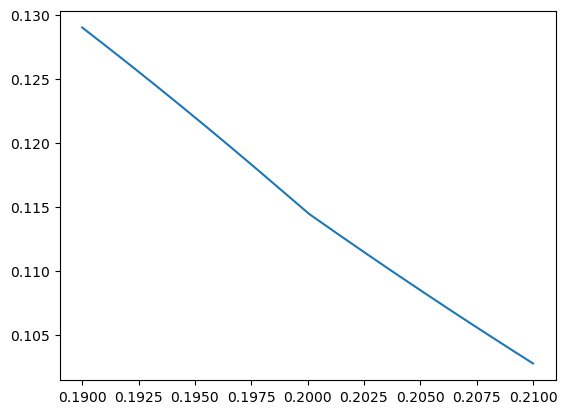

In [18]:
x=np.linspace(a-0.01,a+0.01,1000)
plt.plot(x,[wave_odd(i,E2) for i in x])

In [73]:
def int_Retangular(f,a,b,n):
    x=np.linspace(a+(b-a)/(2*n),b-(b-a)/(2*n),n,dtype=np.float64)
    intfx=np.sum([f(i) for i in x])*(b-a)/n
    return intfx

In [75]:
int_Retangular(lambda x:wave_even(x,E1)**2,-5*a,5*a,10000)

0.004748059224971344

In [93]:
def print_even(E,i):
    beta=np.sqrt((V0-E)*k)
    C=F=1
    B=np.e**(-beta*a)/np.cos(np.sqrt(k*a**2*E))
    print(f"\nwave function of E{i}={E:.5f}:")
    norm=np.sqrt(int_Retangular(lambda x:wave_even(x,E)**2,-5*a,5*a,10000))
    print(f"{F/norm:.{4}f} Exp(-{beta:.4f}*x) for x>a")
    print(f"{C/norm:.{4}f} Exp({beta:.4f}*x) for x<-a")
    print(f"{B/norm:.{4}f} cos({np.sqrt(k*E):.4f}*x) for -a<x<a")
def print_odd(E,i):
    beta=np.sqrt((V0-E)*k)
    F=1
    C=-F
    A=np.e**(-beta*a)/np.sin(np.sqrt(k*a**2*E))
    print(f"\nwave function of E{i}={E:.5f}:")
    norm=np.sqrt(int_Retangular(lambda x:wave_odd(x,E)**2,-5*a,5*a,10000))
    print(f"{F/norm:.{4}f} Exp(-{beta:.4f}*x) for x>a")
    print(f"{C/norm:.{4}f} Exp({beta:.4f}*x) for x<-a")
    print(f"{A/norm:.{4}f} sin({np.sqrt(k*E):.4f}*x) for -a<x<a")

